# Utilizing_full_TPU : (Part - 1) A Journey from image/label to tfrecord in GCS

### Hello reders,
In this notebook we will be dissusing about the Tfrecord files and fully utilizing the TPU. 

While we all know that the TPU is awesome and the fetures it provides can help us in the high processing tasks specially when dealing with large nureal networks and image data. 

In this compitation we are using image data and task is fairly complicated.Utilizing TPU not only provides Us the high processing power but also makes the experimenting with the new model very easy. 

Here in this notebook we will learn many things about the tfrecord files and TPU.


In [ ]:
#here 

### Following is the overview of the notebook

### Part - 1

#### BASIC INFO 
* What is TPU and why should we use it here?
* What are Tfrec files and how it is useful?


#### GCS SET UP  
* What are GCP and GCS?
* Why do we need GCS?
* Setting up your GCS bucket and permissions

#### From IMAGES-LABELS to tfrec in GCP 
* looking in the data
* Converting image labels to tfrec
* uploading to GCP bucket



### part - 2


#### From GCP bucket to train/Val dataset 
* loading and preprocessing the tfrec files 
* generating the train/val dataset

#### Setup the deep learning model 
* Transfer learning block
* Fine tunning block 
* CNN and FNN blocks 
* compile and set up the model 

#### Training the model ( Experiments ) 
* training the model 
* saving the best 

#### Inference 
* Using the saved model 
* making the submition file 

#### Final Points 
* What can be modified 
...


In [ ]:
#start

### Let's begin 

In [ ]:
# imports 

import re, time
import os, sys, math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt


import tensorflow as tf
print("Tensorflow version " + tf.__version__)
AUTOTUNE = tf.data.AUTOTUNE

## BASIC INFO

In this section we will be dissusing about the basic information need to continue with the notebook 

### What is TPU and why should we use it here ?

Tensor Processing Unit (TPU) is an AI accelerator application-specific integrated circuit (ASIC) developed by Google specifically for neural network machine learning, particularly using Google's own TensorFlow software.

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/be/Tensor_Processing_Unit_3.0.jpg/220px-Tensor_Processing_Unit_3.0.jpg)

Well, we know that TPU is incredibly useful when we have large neural networks. Cloud TPU resources accelerate the performance of linear algebra computation and thus give us high-speed processing. 



TPUs pair a classic vector processor with a dedicated matrix multiply unit and excel at any task where large matrix multiplications dominate, such as neural networks.
You can learn more [here](https://codelabs.developers.google.com/codelabs/keras-flowers-data#2).


#### Note: Kaggel TPU is in high demand these days and thus we may not get the TPU, but we can always use the Google colab TPU it's easily available.  



In [ ]:
# #TPUs

# tpu = tf.distribute.cluster_resolver.TPUClusterResolver.connect() # TPU detection
# strategy = tf.distribute.TPUStrategy(tpu)

# print("Number of accelerators: ", strategy.num_replicas_in_sync)


In [ ]:
# # mixed precision
# # On TPU, bfloat16/float32 mixed precision is automatically used in TPU computations.
# # Enabling it in Keras also stores relevant variables in bfloat16 format (memory optimization).
# # On GPU, specifically V100, mixed precision must be enabled for hardware TensorCores to be used.
# # XLA compilation must be enabled for this to work. (On TPU, XLA compilation is the default)
# MIXED_PRECISION = False
# if MIXED_PRECISION:
#     policy = tf.keras.mixed_precision.Policy('mixed_bfloat16')
#     tf.keras.mixed_precision.set_global_policy(policy)
#     print('Mixed precision enabled')

As this is an computer vision compitation we need to process a lot of visula information and the model that we use for such applications can be very large and complicated. 

In such compitations we need to constatly conduct experiemtnts to find the best technique/model. In order to do so we need a fine TPU set up ready to use and experiemnt 



In [ ]:
#here

### What is Tfrec files and how it is usefull ?


Tensorflow has its own file format called as TFRecord or tfrec file format for storing a sequence of binary records. Using Tfrecord has many advantages especially when dealing with large datasets and TPU. 

The TFRecord files are stored in binary which means it takes very little space compared to standard storage, As well as many TensorFlow functionalities that are specially modified to run faster when used with the TFRecoed. Using TFRecord also increases your training performance. 



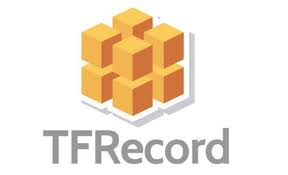


Here in this competition, we have a huge dataset that can not directly be loaded into the memory. We load the batches of the data into the memory and then process it, for such applications TFReocrd files are very helpful. The only downside is we have to convert the data into TFRecord before using and conversion is not really straightforward. 


Using TFRecord is very useful when we are dealing with TPU, As TPUs are very fast, often the problem is to feed the data to the TPU fast enough to keep the TPU busy and that’s why using TFRcord files stored in GCS is ideal for such tasks. We will talk more about this soon…



In [ ]:
#break

## GCS SET UP

### What are GCP and GCS?


GCP stands for Google cloud platform and it is a public cloud vendor. GCP provides a lot of clouds functionalities like compute engines, virtual machines, cloud storage, and many more.
More on GCP [here](https://en.wikipedia.org/wiki/Google_Cloud_Platform).  

GCS stands for google cloud storage. Google Cloud Storage is a RESTful online file storage web service for storing and accessing data on Google Cloud Platform infrastructure. We will be using GCS for our data storage.
More on GCS [here](https://en.wikipedia.org/wiki/Google_Cloud_Storage). 



In [ ]:
#here

## Why do we need GCS?

Well, one might wonder why do we need GCS. AS we know The Tensor Processing Unit (TPU) hardware accelerators are very fast. Problem is to feed the data fast enough to keep the TPU busy. 

Note: I imagine that reader is using cloud TPU only.

When dealing with the Clod TPU we have two options, 
* load all the data into the memory to use with TPU 
* load the batches of the data while training.



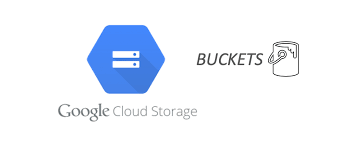

The first option is not possible as we don’t have that much memory available to load all the data.
The second option however seems possible because our data can be loaded in batches, but remember the problem we talked about that TPUs are very fast, and the problem is with feeding the data to the TPU. local storage won’t work even if we are using TFRecord file format.

Google Cloud Storage (GCS) is capable of sustaining very high throughput. And that is why we need to use GCP with TPU.


In [ ]:
#here

### Setting up your GCS bucket and adding permissions 

First, off all You need to create the GCP billing account (a simple free account is good enough ) 
You can learn all about creating the GCP project [here](https://cloud.google.com/resource-manager/docs/creating-managing-projects).

Once you have the project ready with a valid billing account, you can move to creating the GCS bucket. Creating and managing a GCS bucket is easy if you have experience with cloud services. If you don’t have much experience you can always learn !!! 
More information on creating the GCS bucket [here](https://cloud.google.com/storage/docs/creating-buckets). 

Once you have the GCS bucket ready, You need to manage the permissions to access and modify the GCS bucket
[here](https://cloud.google.com/storage/docs/access-control/using-iam-permissions).  


#### Note: You can notice that I haven’t included any defined steps for GCP actions because in my personal experience it’s always best to look into the updated documentation for solving the problem.



In [ ]:
#here

## A journey from IMAGES-LABELS to tfrec in GCS

Here in this section, we will convert the image/label pair to the tf record files 


### Let's see the data once ( brushing up a little ) 

We have seen the complete EDA and all about that so we will not be going through everything again, but let’s just see the data and its structure


The data is simple, We have a lot of images in the train folder and we have one train.csv file wich contains the label for each image and we want to have the pair of the image and label so that we can convert it into the respective tfrec file 

In [ ]:
import pandas as pd

df = pd.read_csv('../input/petfinder-pawpularity-score/train.csv',usecols = ['Id','Pawpularity'])
df.head()

We can see that the Pawpularity ranges from 1 to 100, It would be simple if we have 100 folders each containing the images belonging to that particular category.

#### We are going to set up the directory and have all the images put into their respective labeled folder 

In [ ]:
!mkdir Data

In [ ]:
import os

for i in range(100):

  path = os.path.join('./Data', str(i+1))
  os.mkdir(path)


Now let’s move all the images 

In [ ]:
import shutil

s_path = '../input/petfinder-pawpularity-score/train/'
d_path = './Data/' 

for id_, class_ in zip(df['Id'],df['Pawpularity']):  
    
  shutil.copy(s_path+str(id_)+'.jpg',d_path+str(class_))


We are done with the basic setup, We can start converting 

In [ ]:
#break

Display utility 

In [ ]:
def display_images_from_dataset(dataset):
  plt.figure(figsize=(13,13))
  subplot=331
  for i, (image, label) in enumerate(dataset):
    plt.subplot(subplot)
    plt.axis('off')
    plt.imshow(image.numpy().astype(np.uint8))
    plt.title(label.numpy().decode("utf-8"), fontsize=16)
    subplot += 1
    if i==8:
      break
  #plt.tight_layout()
  plt.subplots_adjust(wspace=0.1, hspace=0.1)
  plt.show()

## Creating the Dataset 

Let's set up a few things before we move to the conversion 
flowing are the information about the attributes  we are using:

* TARGET_SIZE: the size of the final image in the dataset ( i.e the final dataset will contain the images of this size in the tfrec format )
* LOCAL_INPUT: location of the input images 
* GCS_OUTPUT: location of the output GCS bucket 
* SHARDS: no. of tfrec files produced as output and stored in the GCS bucket 


NOTE: We are not going to convert every single image label into its respective tfrec file because of the I/O problem. We have discussed the problem of fast feeding the data to TPU, Even though the GCS bucket is very fast but we can not trust the internet connection or any networking issue, and thus instead of putting soo many tfrec files in the GCS, we simply generate a relatively small amount of the tfrec files containing all the data. 

This makes the input pipeline more efficient.


In [ ]:
# We are taking small size for quick demostration, You can take any size 
TARGET_SIZE = [256,256] 

LOCAL_INPUT ='./Data/*/*.jpg'
GCS_OUTPUT = 'gs://exampel_bucket/example_folder_/'  # prefix for output file names

SHARDS = 16


In [ ]:
#  maps to the labels in the data (folder names)
CLASSES = [str(i) for i in range(1,101) ] # simply maps the image to Pawpularity 
print(CLASSES[:5])

In [ ]:
nb_images = len(tf.io.gfile.glob(LOCAL_INPUT))
shard_size = math.ceil(1.0 * nb_images / SHARDS)
print("Pattern matches {} images which will be rewritten as {} .tfrec files containing {} images each.".format(nb_images, SHARDS, shard_size))


Now we are going to produce the first dataset 


Note: just a thing, We define the dataset structure, what to do with the image, and all about the image processing.  the real images are not stored in the dataset object, it happens  when we fetch the batch from the dataset object.


Here we simply decode the image label in the dataset1. 

We will be experimenting more. 

In [ ]:
def decode_jpeg_and_label(filename):
    
  bits = tf.io.read_file(filename) # this will not allow the reading from local file system, changing to normal read
  image = tf.io.decode_jpeg(bits)
    
  # parse flower name from containing directory
  label = tf.strings.split(tf.expand_dims(filename, axis=-1), sep='/')
  label = label.values[-2]
  return image, label

In [ ]:
filenames = tf.data.Dataset.list_files(LOCAL_INPUT, seed=35155) # This also shuffles the images

dataset1 = filenames.map(decode_jpeg_and_label, num_parallel_calls=AUTOTUNE)


Let's see the images in the dataset.

In [ ]:
display_images_from_dataset(dataset1)

In [ ]:
#here

Now, this looks pretty much it, But we need to do some processing.

#### Resize and crop 

In [ ]:
def resize_and_crop_image(image, label):
  # Resize and crop using "fill" algorithm:
  # always make sure the resulting image
  # is cut out from the source image so that
  # it fills the TARGET_SIZE entirely with no
  # black bars and a preserved aspect ratio.
  w = tf.shape(image)[0]
  h = tf.shape(image)[1]
  tw = TARGET_SIZE[1]
  th = TARGET_SIZE[0]
  resize_crit = (w * th) / (h * tw)
  image = tf.cond(resize_crit < 1,
                  lambda: tf.image.resize(image, [w*tw/w, h*tw/w]), # if true
                  lambda: tf.image.resize(image, [w*th/h, h*th/h])  # if false
                 )
  nw = tf.shape(image)[0]
  nh = tf.shape(image)[1]
  image = tf.image.crop_to_bounding_box(image, (nw - tw) // 2, (nh - th) // 2, tw, th)
  return image, label
  


In [ ]:
dataset2 = dataset1.map(resize_and_crop_image, num_parallel_calls=AUTOTUNE)

In [ ]:
display_images_from_dataset(dataset2)

In [ ]:
#here

#### Recompress 

In [ ]:
def recompress_image(image, label):
  height = tf.shape(image)[0]
  width = tf.shape(image)[1]
  image = tf.cast(image, tf.uint8)
  image = tf.image.encode_jpeg(image, optimize_size=True, chroma_downsampling=False)
  return image, label, height, width



In [ ]:
dataset3 = dataset2.map(recompress_image, num_parallel_calls=AUTOTUNE)

# sharding: there will be one "batch" of images per file 
dataset3 = dataset3.batch(shard_size) 

Three types of data can be stored in TFRecords: byte strings (list of bytes), 64 bit integers and 32 bit floats. They are always stored as lists, a single data element will be a list of size 1. You can use the following helper functions to store data into TFRecords.


#### Writing byte strings

In [ ]:
def _bytestring_feature(list_of_bytestrings):
  return tf.train.Feature(bytes_list=tf.train.BytesList(value=list_of_bytestrings))

#### Writing integers

In [ ]:
def _int_feature(list_of_ints): # int64
  return tf.train.Feature(int64_list=tf.train.Int64List(value=list_of_ints))

#### Writing floats

In [ ]:
def _float_feature(list_of_floats): # float32
  return tf.train.Feature(float_list=tf.train.FloatList(value=list_of_floats))

Its time for writing the TFrec files, To do so we use the above functions and then convert the image labels into the tfrec files.

In [ ]:
def to_tfrecord(tfrec_filewriter, img_bytes, label, height, width):  

  # work around for the problme of leabeling all the image to zero 
  class_num = int(label)-1#np.argmax(np.array(CLASSES)==int(label)) # 'roses' => 2 (order defined in CLASSES)


  one_hot_class = np.eye(len(CLASSES))[class_num]     # [0, 0, 1, 0, 0 ... 0] for class #2

  feature = {
      "image": _bytestring_feature([img_bytes]), # one image in the list
      "class": _int_feature([class_num]),        # one class in the list
      
      # additional (not very useful) fields to demonstrate TFRecord writing/reading of different types of data
      "label":         _bytestring_feature([label]),          # fixed length (1) list of strings, the text label
      "size":          _int_feature([height, width]),         # fixed length (2) list of ints
      "one_hot_class": _float_feature(one_hot_class.tolist()) # variable length  list of floats, n=len(CLASSES)
  }
  return tf.train.Example(features=tf.train.Features(feature=feature))

Now we have understood a lot about the tfrec files and tf.data.

It’s time for writing all that tfrec files into the GCS bucket.

Note: So far we have defined the structure only, now we will be utilizing this structure to do the actual action, the below cell can take some time depending on the image size and processing power. 


In [ ]:
print("Writing TFRecords")


for shard, (image, label, height, width) in enumerate(dataset3):
  # batch size used as shard size here
  shard_size = image.numpy().shape[0]
  # good practice to have the number of records in the filename
  filename = GCS_OUTPUT + "{:02d}-{}.tfrec".format(shard, shard_size)
  
  with tf.io.TFRecordWriter(filename) as out_file:
    for i in range(shard_size):
      example = to_tfrecord(out_file,
                            image.numpy()[i], # re-compressed image: already a byte string
                            label.numpy()[i],
                            height.numpy()[i],
                            width.numpy()[i])
      out_file.write(example.SerializeToString())
    print("Wrote file {} containing {} records".format(filename, shard_size))
    

In [ ]:
#break

Finally, we have successfully converted the image labels into tfrec and saved all the files into the GCS bucket.

In a nutshell, we have done the following:

* Rearrange the data in multiple folders 
* Read the data and perform certain operations ( we can have any type of processing we want )
* Convert the data into the tfrec files 
* Write the tfrec files into the GCS bucket 

I hope the journey was interesting, in the next part we will read the data from the GCS bucket in the form of tf.data.dataset And train the deep learning model using TPU.


In [ ]:
#end

### Thank you, Happy to hear any thoughts/suggestions :) ...